# Project 1: Data Preprocessing

In this project, I will be preparing a report for a bank’s loan division to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan.

Multiple questions will be answered in the notebook below

## Step 1: Open the data file and import libraries

Importing pandas to make use of dataframes and series.
Importing nltk to possibly use the tokenize, stem, or lemma features

In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv('credit_scoring_eng.csv')

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


## Step 2: Preprocess the Data

Based on the sample of the data above a few things stand out:
- I will use .info() to confirm data types and change them if necessary (days_employed + total_income)
- days_employed column has both positive and negative values. Related to income_type as retirees have positive days while all other types have negative days. Fix by making all positive values
- education has the same values but some capitalization. I will use the .lower() method to standardize it
- both the days_employed and total_income column are missing values, will confirm using .isna() method and then fillna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

### Fill empty values with the mean of the column
Using mean of the column the missing values are in.

In [6]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].mean())
df['total_income'] = df['total_income'].fillna(df['total_income'].mean())
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Convert type of floats to integers

In [7]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Make values lowercase and make all days_employed positive
Without context, cannot understand why values are negative

In [8]:
df['education'] = df['education'].str.lower()
df['days_employed'] = abs(df['days_employed'])

In [9]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding


### Find and delete duplicate values
Using all columns sinc ethe likelihood of income and employed being the same along with the other variables is so small.

In [10]:
df.duplicated().sum()

71

In [11]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [12]:
df.shape

(21454, 12)

### Create new columns to group and categorize data
I want to split the below columns into ranges:
- dob_years
- days_employed
- total_income
- purpose

In [13]:
def age_range (age):
    if age <= 25:
        return 'young'
    if age <= 64:
        return 'adult'
    return 'old'

df['age_range'] = df['dob_years'].apply(age_range)
df['age_range'].value_counts()

adult    19226
young     1333
old        895
Name: age_range, dtype: int64

In [14]:
def career_len (days):
    if days <= 2000:
        return 'early'
    if days <= 5000:
        return 'senior'
    return 'master'

df['career_length'] = df['days_employed'].apply(career_len)
df['career_length'].value_counts()

early     9168
master    7316
senior    4970
Name: career_length, dtype: int64

In [15]:
# income ranges from $3,000 --> $360,000
def inc_range(income):
    if income <= 50000:
        return 'poor'
    if income <= 100000:
        return 'middle'
    return 'wealthy'

df['wealth_status'] = df['total_income'].apply(inc_range)
df['wealth_status'].value_counts()

poor       20134
middle      1221
wealthy       99
Name: wealth_status, dtype: int64

In [16]:
df['purpose'].value_counts()

wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

### breakdown of purposes by hand
- wedding -- wedding
- real estate / housing / house / property -- property
- university / education / educated -- education
- car / cars -- car

In [17]:
def loan_purpose(purpose):
    purpose = nltk.word_tokenize(purpose)
    if 'wedding' in purpose:
        return 'wedding'
    if 'estate' in purpose or 'house' in purpose or 'housing' in purpose or 'property' in purpose:
        return 'property'
    if 'university' in purpose or 'education' in purpose or 'educated' in purpose:
        return 'education'
    if 'car' in purpose or 'cars' in purpose:
        return 'car'
    return 'ERROR'

df['loan_purpose'] = df['purpose'].apply(loan_purpose)
df['loan_purpose'].value_counts()

property     10811
car           4306
education     4013
wedding       2324
Name: loan_purpose, dtype: int64

In [18]:
def lpid(lp):
    if lp == 'property':
        return 0
    if lp == 'car':
        return 1
    if lp == 'education':
        return 2
    return 3

df['loan_purpose_id'] = df['loan_purpose'].apply(lpid)

In [19]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_range,career_length,wealth_status,loan_purpose,loan_purpose_id
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,adult,master,poor,property,0
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase,adult,senior,poor,car,1
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,adult,master,poor,property,0
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,adult,senior,poor,education,2
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,adult,master,poor,wedding,3


## Step 3: Answer Questions

### #1 Is there a connection between having kids and repaying a loan on time?

In [20]:
c = df['children'].corr(df['debt'])
print('Correlation of number of children and paying a loan on time --> {:.2f}%'.format(c*100))

Correlation of number of children and paying a loan on time --> 1.83%


   children  count      mean  median
0        -1     47  0.021277       0
1         0  14091  0.075438       0
2         1   4808  0.092346       0
3         2   2052  0.094542       0
4         3    330  0.081818       0
5         4     41  0.097561       0
6         5      9  0.000000       0
7        20     76  0.105263       0


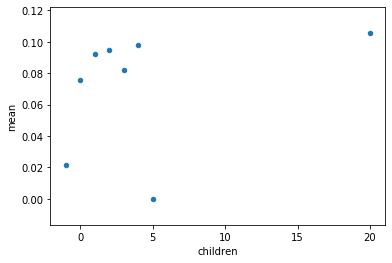

In [21]:
kd = df.groupby('children')['debt'].agg(['count','mean','median']).reset_index()
print(kd)
kd.plot(kind='scatter',x='children',y='mean')

In [22]:
print('Default rate for 0 children --> {:.2f}%'.format(kd['mean'][1]*100))
print('Default rate for 1 child --> {:.2f}%'.format(kd['mean'][2]*100))
print('Default rate for 2 children --> {:.2f}%'.format(kd['mean'][3]*100))
print('Default rate for 3 children --> {:.2f}%'.format(kd['mean'][4]*100))
print('Default rate for 4 children --> {:.2f}%'.format(kd['mean'][5]*100))
print('Default rate for 5 children --> {:.2f}%'.format(kd['mean'][6]*100))

Default rate for 0 children --> 7.54%
Default rate for 1 child --> 9.23%
Default rate for 2 children --> 9.45%
Default rate for 3 children --> 8.18%
Default rate for 4 children --> 9.76%
Default rate for 5 children --> 0.00%


#### With a correlation of 1.83% and default rates for 0-4 children only ranging 7.54% to 9.76%, there is not much of a connection between the two variables.
#### Borrowers with 5 children have a rate of 0% but the sample size is only 9, so we can't really trust it.
#### Borrowers without children have the lowest default rates

-----------------------------------------------------

### #2 Is there a connection between marital status and repaying a loan on time?

In [23]:
fam_debt = df['family_status_id'].corr(df['debt'])
print('Correlation of family status and paying a loan on time --> {:.2f}%'.format(fam_debt*100))

Correlation of family status and paying a loan on time --> 2.03%


       family_status  count      mean  median
0  civil partnership   4151  0.093471       0
1           divorced   1195  0.071130       0
2            married  12339  0.075452       0
3          unmarried   2810  0.097509       0
4    widow / widower    959  0.065693       0


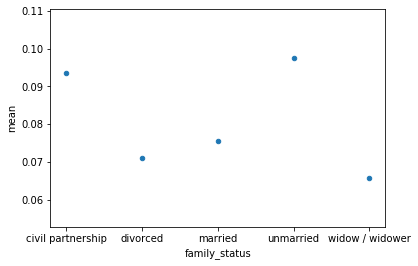

In [24]:
fd = df.groupby('family_status')['debt'].agg(['count','mean','median']).reset_index()
print(fd)
fd.plot(kind='scatter',x='family_status',y='mean')

#### Again here, the calculated correlation is only 2.03% showing a low connection between family status and paying a loan on time
#### In general, those who are married or have been married have slightly lower default rates than those who are unmarried or in civil partnerships

--------

### #3 Is there a connection between income level and repaying a loan on time?

In [25]:
inc_debt = df['total_income'].corr(df['debt'])
print('Correlation of income and paying a loan on time --> {:.2f}%'.format(inc_debt*100))

Correlation of income and paying a loan on time --> -1.19%


  wealth_status  count      mean  median
0        middle   1221  0.070434       0
1          poor  20134  0.081901       0
2       wealthy     99  0.060606       0


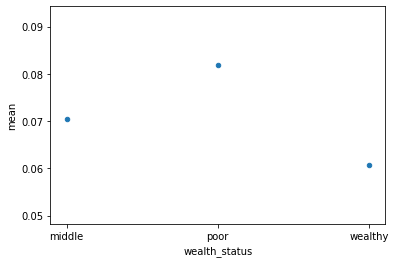

In [26]:
id = df.groupby('wealth_status')['debt'].agg(['count','mean','median']).reset_index()
print(id)
id.plot(kind='scatter',x='wealth_status',y='mean')

#### Here we have low negative correlation calculated at -1.19%
#### Looking at the default rates by group we can see that higher income in general relates to lower rates of default, but we need to keep in mind that there are only 99 datapoints for the "wealthy" category (over $100k income)


-----------

### #4 How do different loan purposes affect timely loan repayment?

In [27]:
purp_debt = df['loan_purpose_id'].corr(df['debt'])
print('Correlation of loan purpose and paying a loan on time --> {:.2f}%'.format(purp_debt*100))

Correlation of loan purpose and paying a loan on time --> 2.17%


  loan_purpose  count      mean  median
0          car   4306  0.093590       0
1    education   4013  0.092200       0
2     property  10811  0.072334       0
3      wedding   2324  0.080034       0


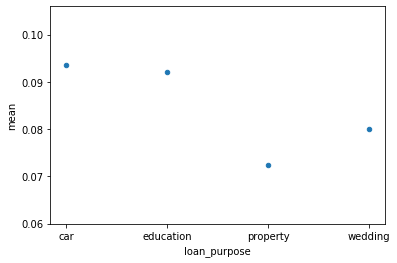

In [28]:
pu_d = df.groupby('loan_purpose')['debt'].agg(['count','mean','median']).reset_index()
print(pu_d)
pu_d.plot(kind='scatter',x='loan_purpose',y='mean')

#### Purpose of the loan has the highest of the four correlations, but still rather low at 2.17%
#### Based on the categories, we can tell that property has the lowest default rate, likely because many of them were investments that were expecting to receive income from renting the space

---------

## Step 4: Overall Conclusion

### With this data we can make sense of a few items but find that a lot of the variables we were looking at, do not have a major effect on a borrower repaying a loan on time. More high quality data that reflective of the larger population would help increase accuracy in our findings. 
### In the 4 questions above we had the following correlations:
- Number of children: 1.83%
- Family status: 2.03%
- Income: -1.19%
- Loan purpose: 2.17%
### Based on this data and those 4 variable the borrower with the lowest chance of default has no children, is currently or has been married, has over $100,000 income, and is using the loan to buy a home or investment property